In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\skumar2\OneDrive - Business Services North America\Desktop\sp\Credit EDA Case Study\application_data.csv")

In [3]:
empt_col=df.isna().sum()
empt_col=empt_col.loc[empt_col.values>df.shape[0]*0.1].index

In [4]:
df.drop(labels=empt_col,axis=1,inplace=True)
len(df.columns)

65

In [5]:
emty_lst=[]
for col in df.columns:
    if col.startswith('FLAG'):
        emty_lst.append(col)


In [6]:
df.drop(columns=emty_lst,inplace=True)

In [7]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0
307507,456252,0,Cash loans,F,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,...,0,0,0,XNA,0.115992,0.0,0.0,0.0,0.0,0.0
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,0,1,1,School,0.535722,6.0,0.0,6.0,0.0,-1909.0
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,1,1,0,Business Entity Type 1,0.514163,0.0,0.0,0.0,0.0,-322.0


In [8]:
df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [9]:
df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']="F"

In [10]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [11]:
df=df.loc[df['ORGANIZATION_TYPE']!='XNA']

In [12]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,...,0,0,0,Self-employed,0.530725,0.0,0.0,0.0,0.0,0.0
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,0,1,1,School,0.535722,6.0,0.0,6.0,0.0,-1909.0
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,1,1,0,Business Entity Type 1,0.514163,0.0,0.0,0.0,0.0,-322.0


In [13]:
df.dropna(thresh=df.shape[1]-df.shape[1]*0.05,inplace=True)

C:\Users\local_skumar2\Temp\ipykernel_12616\1024939465.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(thresh=df.shape[1]-df.shape[1]*0.05,inplace=True)


In [14]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,...,0,0,0,Self-employed,0.530725,0.0,0.0,0.0,0.0,0.0
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,0,1,1,School,0.535722,6.0,0.0,6.0,0.0,-1909.0
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,1,1,0,Business Entity Type 1,0.514163,0.0,0.0,0.0,0.0,-322.0


In [15]:
q1,q2,q3=np.percentile(df['AMT_INCOME_TOTAL'],[25,50,75])
IQR=q3-q1
lx=q1 - 1.5*IQR
Ux=q3 + 1.5*IQR

In [16]:
df=df.loc[(df['AMT_INCOME_TOTAL']>lx) & (df['AMT_INCOME_TOTAL']<Ux)]

In [17]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,...,0,0,0,Self-employed,0.530725,0.0,0.0,0.0,0.0,0.0
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,0,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,0,1,1,School,0.535722,6.0,0.0,6.0,0.0,-1909.0
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,1,1,0,Business Entity Type 1,0.514163,0.0,0.0,0.0,0.0,-322.0


# DATA CLEANING END

In [18]:
bins=np.arange(0,round(df['AMT_INCOME_TOTAL'].max()),25000)

In [19]:
slot=['0-25000','25000-50000','50000-75000','75000-100000','100000-125000','125000-150000','150000-175000','175000-200000','200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000']

In [20]:
df['AMT_INCOME_TOTAL_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

C:\Users\local_skumar2\Temp\ipykernel_12616\3491733786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AMT_INCOME_TOTAL_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)


In [21]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL_RANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,Business Entity Type 3,0.262949,2.0,2.0,2.0,2.0,-1134.0,200000-225000
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,School,0.622246,1.0,0.0,1.0,0.0,-828.0,250000-275000
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,Government,0.555912,0.0,0.0,0.0,0.0,-815.0,50000-75000
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,Business Entity Type 3,0.650442,2.0,0.0,2.0,0.0,-617.0,125000-150000
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,1,1,Religion,0.322738,0.0,0.0,0.0,0.0,-1106.0,100000-125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,...,0,0,Self-employed,0.530725,0.0,0.0,0.0,0.0,0.0,150000-175000
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,0,0,Services,0.681632,0.0,0.0,0.0,0.0,-273.0,150000-175000
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,1,1,School,0.535722,6.0,0.0,6.0,0.0,-1909.0,150000-175000
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,1,0,Business Entity Type 1,0.514163,0.0,0.0,0.0,0.0,-322.0,150000-175000


In [22]:
emp_lst=[]
for col1 in df.columns:
    if col1.endswith('CIRCLE'):
        emp_lst.append(col1)

emp_lst

['OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [23]:
df.drop(labels=emp_lst,axis=1,inplace=True)

C:\Users\local_skumar2\Temp\ipykernel_12616\3078154860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(labels=emp_lst,axis=1,inplace=True)


In [24]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL_RANGE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,0,0,0,0,0,0,Business Entity Type 3,0.262949,-1134.0,200000-225000
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,0,0,0,0,0,0,School,0.622246,-828.0,250000-275000
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,0,0,0,0,0,0,Government,0.555912,-815.0,50000-75000
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,0,0,0,0,0,0,Business Entity Type 3,0.650442,-617.0,125000-150000
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,0,0,0,0,1,1,Religion,0.322738,-1106.0,100000-125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,0,153000.0,331920.0,16096.5,225000.0,Unaccompanied,...,0,0,0,0,0,0,Self-employed,0.530725,0.0,150000-175000
307506,456251,0,Cash loans,M,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,...,0,0,0,0,0,0,Services,0.681632,-273.0,150000-175000
307508,456253,0,Cash loans,F,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,...,0,0,0,0,1,1,School,0.535722,-1909.0,150000-175000
307509,456254,1,Cash loans,F,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,...,0,0,0,1,1,0,Business Entity Type 1,0.514163,-322.0,150000-175000


In [25]:
emp_lst1=[]
for col1 in df.columns:
    if col1.find('REGION_NOT')>1:
        emp_lst1.append(col1)

emp_lst1

['REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION']

In [26]:
df.drop(columns=emp_lst1,axis=1,inplace=True)

C:\Users\local_skumar2\Temp\ipykernel_12616\480866958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=emp_lst1,axis=1,inplace=True)


In [27]:
df0=df.loc[df['TARGET']==0]
df1=df.loc[df['TARGET']==1]

In [28]:
pd.options.display.max_columns=None

#                                       TARGET (0) wise visualization 

In [29]:
df0.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL_RANGE'],
      dtype='object')

## Income Type wise count

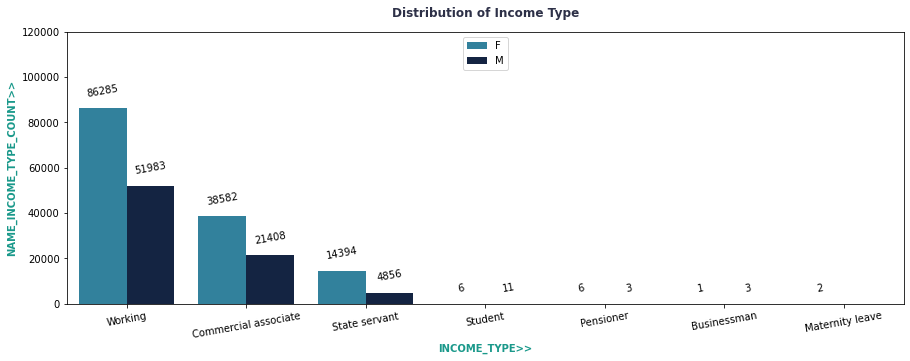

In [30]:
plt.figure(figsize=(15,5))
c={'F':'#208AAE',
  'M':'#0D2149'}
ax =sns.countplot(data=df0,x='NAME_INCOME_TYPE',order=df0['NAME_INCOME_TYPE'].value_counts().index,hue='CODE_GENDER',palette=c)
#ax = sns.countplot(x='User', hue='C', data=df)
for container in ax.containers:
    ax.bar_label(container,color='black',weight='normal',rotation=10,padding=10)
plt.legend(loc=9)
plt.xticks(rotation=10)
plt.yticks(np.arange(0,df0['NAME_INCOME_TYPE'].value_counts()[0],20000))
plt.title("Distribution of Income Type",pad=15,fontdict={'weight':'bold','color':'#2D3047'})
plt.ylabel("NAME_INCOME_TYPE_COUNT>>",fontdict={'weight':'bold','color':'#1B998B'})
plt.xlabel("INCOME_TYPE>>",fontdict={'weight':'bold','color':'#1B998B'})
plt.show()


# Income range wise count

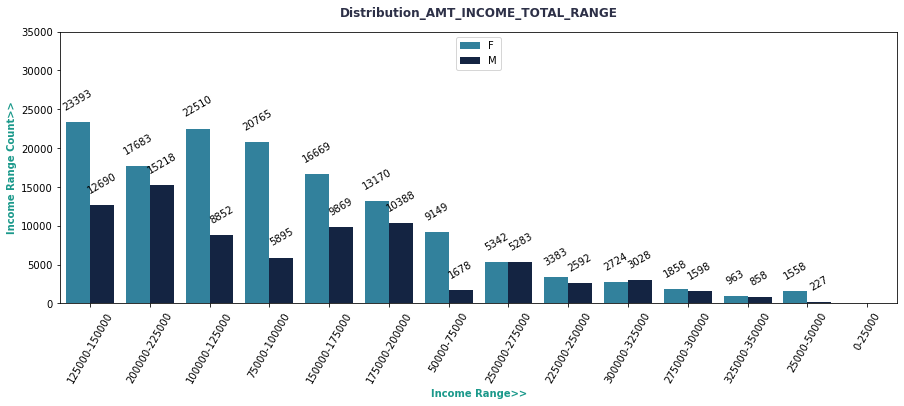

In [31]:
plt.figure(figsize=(15,5))
c={'F':'#208AAE',
  'M':'#0D2149'}
ax =sns.countplot(data=df0,x='AMT_INCOME_TOTAL_RANGE',order=df0['AMT_INCOME_TOTAL_RANGE'].value_counts().index,hue='CODE_GENDER',palette=c)
#ax = sns.countplot(x='User', hue='C', data=df)
for container in ax.containers:
    ax.bar_label(container,color='black',weight='normal',rotation=30,padding=10)
plt.legend(loc=9)
plt.xticks(rotation=60)
plt.yticks(np.arange(0,df0['AMT_INCOME_TOTAL_RANGE'].value_counts()[0],5000))
plt.title("Distribution_AMT_INCOME_TOTAL_RANGE",pad=15,fontdict={'weight':'bold','color':'#2D3047'})
plt.ylabel("Income Range Count>>",fontdict={'weight':'bold','color':'#1B998B'})
plt.xlabel("Income Range>>",fontdict={'weight':'bold','color':'#1B998B'})

plt.show()


#                                       TARGET (1) wise visualization 

# Income range wise count

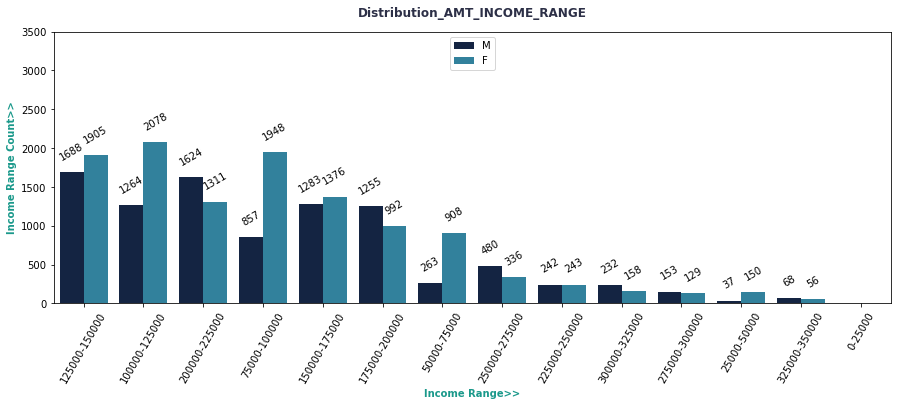

In [32]:
plt.figure(figsize=(15,5))
c={'F':'#208AAE',
  'M':'#0D2149'}
ax =sns.countplot(data=df1,x='AMT_INCOME_TOTAL_RANGE',order=df1['AMT_INCOME_TOTAL_RANGE'].value_counts().index,hue='CODE_GENDER',palette=c)
#ax = sns.countplot(x='User', hue='C', data=df)
for container in ax.containers:
    ax.bar_label(container,color='black',weight='normal',rotation=30,padding=10)
plt.legend(loc=9)
plt.xticks(rotation=60)
plt.yticks(np.arange(0,df1['AMT_INCOME_TOTAL_RANGE'].value_counts()[0],500))
plt.title("Distribution_AMT_INCOME_RANGE",pad=15,fontdict={'weight':'bold','color':'#2D3047'})
plt.ylabel("Income Range Count>>",fontdict={'weight':'bold','color':'#1B998B'})
plt.xlabel("Income Range>>",fontdict={'weight':'bold','color':'#1B998B'})

plt.show()


## Income Type wise count

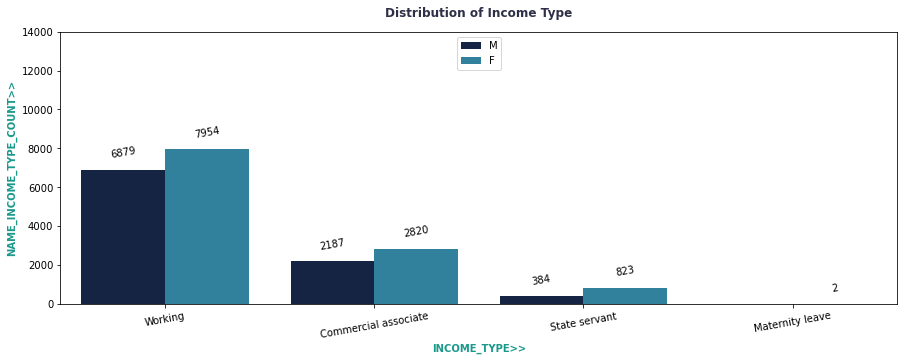

In [33]:
plt.figure(figsize=(15,5))
c={'F':'#208AAE',
  'M':'#0D2149'}
ax =sns.countplot(data=df1,x='NAME_INCOME_TYPE',order=df1['NAME_INCOME_TYPE'].value_counts().index,hue='CODE_GENDER',palette=c)
#ax = sns.countplot(x='User', hue='C', data=df)
for container in ax.containers:
    ax.bar_label(container,color='black',weight='normal',rotation=10,padding=10)
plt.legend(loc=9)
plt.xticks(rotation=10)
plt.yticks(np.arange(0,df1['NAME_INCOME_TYPE'].value_counts()[0],2000))
plt.title("Distribution of Income Type",pad=15,fontdict={'weight':'bold','color':'#2D3047'})
plt.ylabel("NAME_INCOME_TYPE_COUNT>>",fontdict={'weight':'bold','color':'#1B998B'})
plt.xlabel("INCOME_TYPE>>",fontdict={'weight':'bold','color':'#1B998B'})
plt.show()
